In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split


from textblob import TextBlob
import re
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/Users/nauman/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/Users/nauman/Downloads/course_data_clean.csv")
df.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0


In [4]:
df.dtypes

course_code           object
course_title          object
num_ratings            int64
useful                object
easy                  object
liked                 object
num_reviews            int64
reviews               object
course_rating         object
course_rating_int    float64
dtype: object

In [5]:
print(pd.isnull(df).sum().to_string())

course_code            0
course_title           0
num_ratings            0
useful                 2
easy                   3
liked                  3
num_reviews            0
reviews                9
course_rating        222
course_rating_int    222


In [6]:
#show nan values with wrong addresses, drop them
na_values = df[df.isna().any(axis=1)]
na_values.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
50,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,"Thanks to Keiko Katsuragawa, the prof who does...",NaN,NaN
70,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Never taken anything even remotely related and...,NaN,NaN
81,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,"hard at first, will get use to it",NaN,NaN
248,MATH 135,Algebra for Honours Mathematics,1186,84%,41%,78%,253,Interesting but challenging. I should've done ...,NaN,NaN
291,MATH 135,Algebra for Honours Mathematics,1186,84%,41%,78%,253,Hard to get used to the way of thinking at first.,NaN,NaN


In [7]:
null_values_df = df[df['reviews'].isnull()]

In [8]:
null_values_df

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
2810,SPCOM 223,Public Speaking,498,68%,73%,71%,125,NaN,disliked course,0.0
5982,PSYCH 207,Cognitive Processes,165,75%,75%,75%,39,NaN,disliked course,0.0
6540,COOP 2,Co-operative Work Term,136,93%,84%,95%,7,NaN,liked course,1.0
6578,ARBUS 101,Introduction to Business in North America,135,52%,67%,43%,30,NaN,disliked course,0.0
8311,PD 5,Project Management,80,37%,74%,25%,12,NaN,disliked course,0.0
8373,AHS 107,"Sociology of Activity, Health, and Well-being",78,27%,93%,40%,27,NaN,NaN,NaN
10542,ECE 458,Computer Security,39,91%,57%,77%,6,NaN,disliked course,0.0
11287,WKRPT 400M,Work-term Report,31,0%,20%,6%,3,NaN,disliked course,0.0
11395,BIOL 266,Introduction to Computational Biology,29,90%,68%,83%,10,NaN,liked course,1.0


In [9]:
df.dropna(subset=['reviews'], inplace=True)

In [10]:
print(pd.isnull(df).sum().to_string())

course_code            0
course_title           0
num_ratings            0
useful                 2
easy                   3
liked                  3
num_reviews            0
reviews                0
course_rating        221
course_rating_int    221


In [11]:
null_values_df = df[df['useful'].isnull()]
null_values_df

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
14795,SDS 440R,Optimal Living,1,NaN,100%,100%,1,Very easy to get a good grade as long as you d...,liked course,1.0
14835,AFM 417,Special Topics in Accounting,0,NaN,NaN,NaN,1,Topic 3: Intro to Data Analytics,NaN,NaN


In [12]:
df['useful'].fillna(0, inplace=True)
df['liked'].fillna(0, inplace=True)
df['easy'].fillna(0, inplace=True)

In [13]:
print(pd.isnull(df).sum().to_string())

course_code            0
course_title           0
num_ratings            0
useful                 0
easy                   0
liked                  0
num_reviews            0
reviews                0
course_rating        221
course_rating_int    221


In [14]:
#cleaning tweets
#You should also filter out the irrelevant characters, symbols, hashtags, URLs etc. 
#from the tweets to avoid any possible masking of the actual sentiment associated with the tweets

#creating a function to remove all irrelevant characters, symbols, hashtags and URls and keeping only the text.
def remove_emoji(string):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string) 
    
def cleaner(tweet):
    if type(tweet) == np.float64:
        return ""
    r = tweet.lower()
    r = re.sub("'", "", r)
    r = remove_emoji(r)
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    
    r = r.split()

    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]

    r = " ".join(word for word in r)


    return r



In [15]:
df['Clean'] = df.apply(lambda row: row['reviews'].lower(),axis=1)

In [16]:
df['Clean'] = df['Clean'].apply(cleaner)

In [17]:
reviews_list = df.Clean.to_list()
print(reviews_list)

['go office hours practice', 'one my least favourite courses although things were nicely organized racket was such annoying language use one tangible benefit i felt after using racket was feeling more comfortable with recursion', 'it starts with very low pace but after midterm it gets really fast i cannot understand content while reaching end term racket is restricted by so many things so i feel i lose freedom coding assignments are extremely hard after midterm i spent whole day them but i can just solve easiest one only positive impression that i have is that design recipe weighs half so i pass this course successfully', 'took this 2018 with no programming experience ever started out pretty slow but i didnt really pay attention was severely behind went lot office hours but nonetheless caught up did decently well after taking more cs courses racket really is weird language', 'i loved everything about cs 115 great instructors fair assignments can get tricky but theres huge amount office

In [18]:
df

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,Clean
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,go office hours practice
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,one my least favourite courses although things...
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,it starts with very low pace but after midterm...
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0,took this 2018 with no programming experience ...
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0,i loved everything about cs 115 great instruct...
...,...,...,...,...,...,...,...,...,...,...,...
14833,ASL 102R,American Sign Language 2,1,100%,75%,100%,1,Took this online with Georgia Whalen. As it wa...,liked course,1.0,took this online with georgia whalen as it was...
14834,CS 136L,Tools and Techniques for Software Development,1,100%,100%,100%,1,I either designed or helped design the majorit...,liked course,1.0,i either designed or helped design majority th...
14835,AFM 417,Special Topics in Accounting,0,0,0,0,1,Topic 3: Intro to Data Analytics,NaN,NaN,topic 3 intro data analytics
14836,ECON 472,Senior Honours Essay,0,100%,0%,0,1,Not sure if I liked this course yet. Definitel...,NaN,NaN,not sure if i liked this course yet definitely...


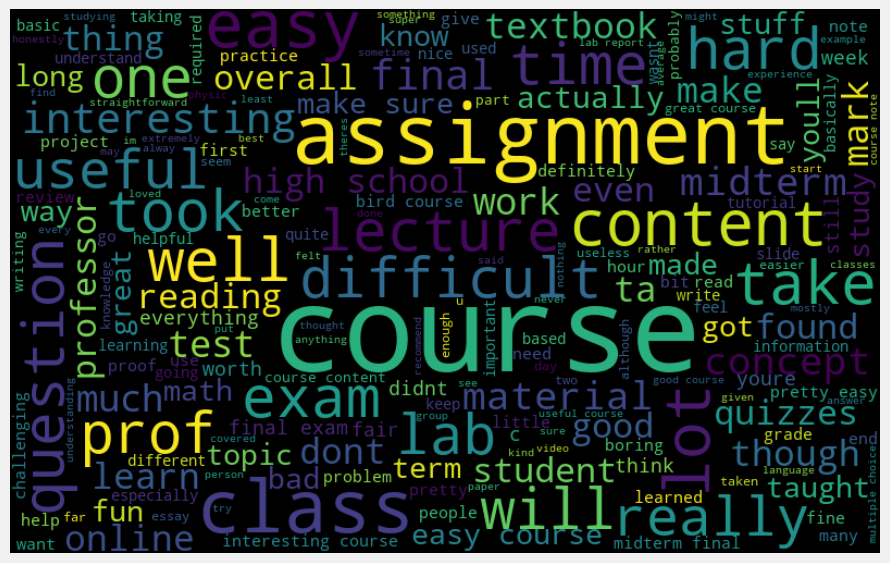

In [19]:
# creating a Wordcloud from the tweets
all_words = ' '.join([text for text in reviews_list])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [20]:
# Your dictionary of words
word_dict = ['assignment', 'course', 'exam','class', 'professor','lecture'] # Add your words and initial values


In [21]:
# Create a 'category' column and assign values based on the presence of words
df['category'] = np.select([df['Clean'].str.contains(word) for word in word_dict], word_dict, default=None)


In [22]:
df

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,Clean,category
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,go office hours practice,None
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,one my least favourite courses although things...,course
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,it starts with very low pace but after midterm...,assignment
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0,took this 2018 with no programming experience ...,course
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0,i loved everything about cs 115 great instruct...,assignment
...,...,...,...,...,...,...,...,...,...,...,...,...
14833,ASL 102R,American Sign Language 2,1,100%,75%,100%,1,Took this online with Georgia Whalen. As it wa...,liked course,1.0,took this online with georgia whalen as it was...,assignment
14834,CS 136L,Tools and Techniques for Software Development,1,100%,100%,100%,1,I either designed or helped design the majorit...,liked course,1.0,i either designed or helped design majority th...,course
14835,AFM 417,Special Topics in Accounting,0,0,0,0,1,Topic 3: Intro to Data Analytics,NaN,NaN,topic 3 intro data analytics,None
14836,ECON 472,Senior Honours Essay,0,100%,0%,0,1,Not sure if I liked this course yet. Definitel...,NaN,NaN,not sure if i liked this course yet definitely...,course


In [23]:
category_counts = df['category'].value_counts()

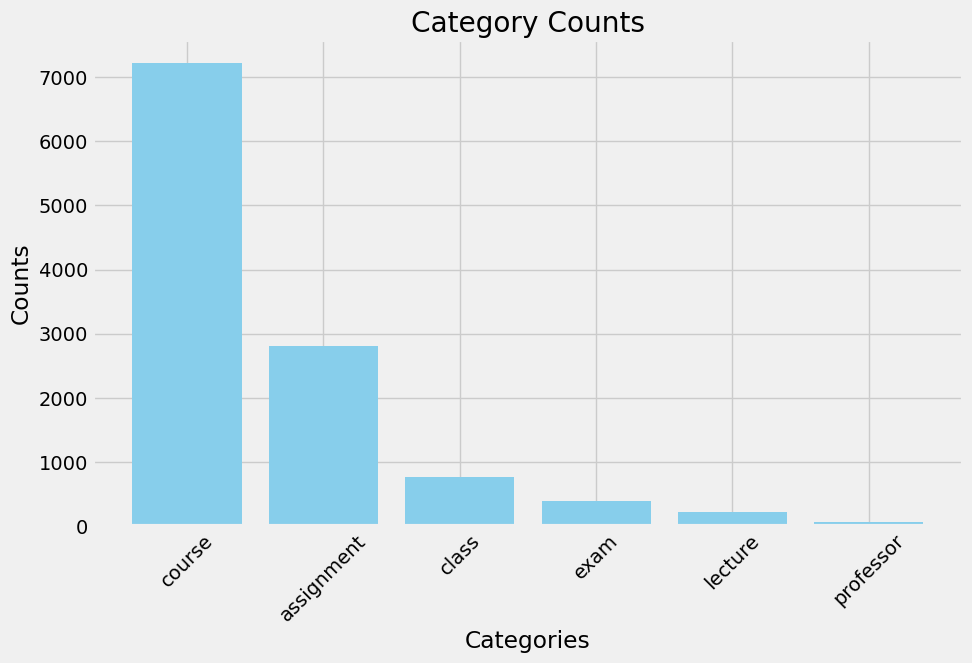

In [24]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.bar(category_counts.index, category_counts.values, color='skyblue')  # You can customize the color

plt.title('Category Counts')  # Title of the chart
plt.xlabel('Categories')  # X-axis label
plt.ylabel('Counts')  # Y-axis label
plt.xticks(rotation=45)  # Optional: Rotate labels to make them readable if they overlap

plt.show()

In [25]:
print(pd.isnull(df).sum().to_string())

course_code             0
course_title            0
num_ratings             0
useful                  0
easy                    0
liked                   0
num_reviews             0
reviews                 0
course_rating         221
course_rating_int     221
Clean                   0
category             3356


In [26]:
null_values_df = df[df['category'].isnull()]

In [27]:
null_values_df

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,Clean,category
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,go office hours practice,None
18,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,"It was okay. All I can say is, do your work an...",liked course,1.0,it was okay all i can say is do your work subm...,None
21,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,so difficult for beginners,disliked course,0.0,so difficult beginners,None
28,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,A good start in cs though Racket seems useless...,liked course,1.0,good start cs though racket seems useless futu...,None
33,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,"well racket, it is ok",liked course,1.0,well racket it is ok,None
...,...,...,...,...,...,...,...,...,...,...,...,...
14789,RS 216,Islam,1,100%,100%,100%,1,Took it with Doaa. Great introduction to Islam...,liked course,1.0,took it with doaa great introduction islam esp...,None
14795,SDS 440R,Optimal Living,1,0,100%,100%,1,Very easy to get a good grade as long as you d...,liked course,1.0,very easy get good grade as long as you do wor...,None
14796,SDS 496R,Applied Apprenticeship in Social Development S...,1,100%,100%,100%,1,"My placement was A+, I was with the Centre for...",liked course,1.0,my placement was i was with centre community b...,None
14808,SPAN 218,Parallel Revolutions in a Nascent Continent,1,0%,100%,0%,1,Boring but keep up and it should be easy.,disliked course,0.0,boring but keep up it should be easy,None


In [28]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [29]:
df['polarity'] = df['Clean'].apply(getTextPolarity)

In [30]:
df

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,Clean,category,polarity
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,go office hours practice,None,0.000000
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,one my least favourite courses although things...,course,0.066667
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,it starts with very low pace but after midterm...,assignment,0.131894
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0,took this 2018 with no programming experience ...,course,-0.011905
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0,i loved everything about cs 115 great instruct...,assignment,0.495238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,ASL 102R,American Sign Language 2,1,100%,75%,100%,1,Took this online with Georgia Whalen. As it wa...,liked course,1.0,took this online with georgia whalen as it was...,assignment,0.165105
14834,CS 136L,Tools and Techniques for Software Development,1,100%,100%,100%,1,I either designed or helped design the majorit...,liked course,1.0,i either designed or helped design majority th...,course,0.287500
14835,AFM 417,Special Topics in Accounting,0,0,0,0,1,Topic 3: Intro to Data Analytics,NaN,NaN,topic 3 intro data analytics,None,0.000000
14836,ECON 472,Senior Honours Essay,0,100%,0%,0,1,Not sure if I liked this course yet. Definitel...,NaN,NaN,not sure if i liked this course yet definitely...,course,0.128333


In [31]:
# Define the threshold values for categorization
positive_threshold = 0.05
negative_threshold = -0.05

# Categorize based on polarity
df['Sentiment_Category'] = pd.cut(df['polarity'], bins=[float('-inf'), negative_threshold, positive_threshold, float('inf')],
                                  labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)

In [32]:
df

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,Clean,category,polarity,Sentiment_Category
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,go office hours practice,None,0.000000,Neutral
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,one my least favourite courses although things...,course,0.066667,Positive
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,it starts with very low pace but after midterm...,assignment,0.131894,Positive
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0,took this 2018 with no programming experience ...,course,-0.011905,Neutral
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0,i loved everything about cs 115 great instruct...,assignment,0.495238,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,ASL 102R,American Sign Language 2,1,100%,75%,100%,1,Took this online with Georgia Whalen. As it wa...,liked course,1.0,took this online with georgia whalen as it was...,assignment,0.165105,Positive
14834,CS 136L,Tools and Techniques for Software Development,1,100%,100%,100%,1,I either designed or helped design the majorit...,liked course,1.0,i either designed or helped design majority th...,course,0.287500,Positive
14835,AFM 417,Special Topics in Accounting,0,0,0,0,1,Topic 3: Intro to Data Analytics,NaN,NaN,topic 3 intro data analytics,None,0.000000,Neutral
14836,ECON 472,Senior Honours Essay,0,100%,0%,0,1,Not sure if I liked this course yet. Definitel...,NaN,NaN,not sure if i liked this course yet definitely...,course,0.128333,Positive


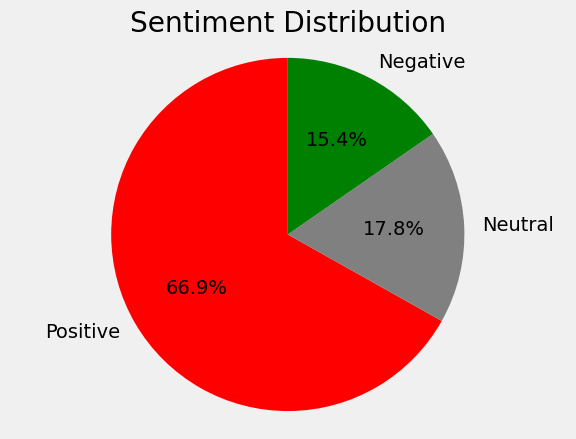

In [33]:
# Create a pie chart
sentiment_counts = df['Sentiment_Category'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'green'])
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

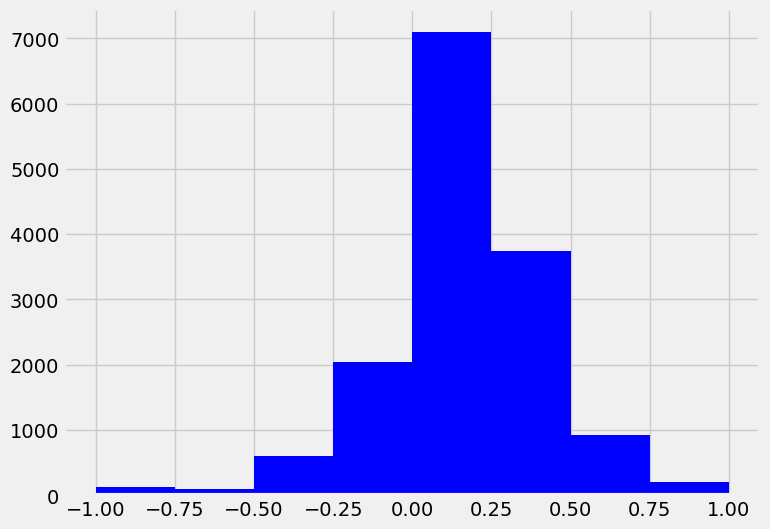

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))

df['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], ax=ax, color="blue")

plt.show()

In [35]:
df[df['category'] == "lecture"]
###['assignment', 'course', 'exam','class', 'professor','lecture']

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,Clean,category,polarity,Sentiment_Category
23,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Must attend lectures if you're new to programm...,liked course,1.0,must attend lectures if youre new programming,lecture,0.136364,Positive
381,ECON 101,Introduction to Microeconomics,1143,64%,70%,45%,214,"Just read the textbook and slides, actual lect...",liked course,1.0,just read textbook slides actual lectures seem...,lecture,-0.083333,Negative
393,ECON 101,Introduction to Microeconomics,1143,64%,70%,45%,214,Could've just been the lecturer (Allison Masce...,disliked course,0.0,couldve just been lecturer allison mascella i ...,lecture,0.102083,Positive
437,ECON 101,Introduction to Microeconomics,1143,64%,70%,45%,214,Take the time to combine notes from lectures a...,disliked course,0.0,take time combine notes lectures textbook over...,lecture,-0.333333,Negative
441,ECON 101,Introduction to Microeconomics,1143,64%,70%,45%,214,Fairly easy as long as you attend the lectures.,liked course,1.0,fairly easy as long as you attend lectures,lecture,0.191667,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14491,BME 353L,Control Systems Laboratory,2,100%,100%,100%,1,There was a lot of hand-holding through the la...,liked course,1.0,there was lot hand holding through labs but it...,lecture,0.350000,Positive
14506,COMM 433,Income Tax for Finance Students,2,75%,0%,50%,1,"Pooooooooooooor teaching, unfortunately. He mu...",disliked course,0.0,pooooooooooooor teaching unfortunately he mumb...,lecture,-0.325000,Negative
14511,EASIA 336R,Korean Pop Culture,2,50%,100%,100%,1,Each lecture covered a topic of pop culture (o...,liked course,1.0,each lecture covered topic pop culture or mult...,lecture,0.240000,Positive
14613,PSCI 355,Russia and its Neighbours,2,100%,0%,50%,1,Very interesting but prof was very dry - three...,liked course,1.0,very interesting but prof was very dry three h...,lecture,0.178333,Positive


In [36]:
df.dropna(subset=['category'], inplace=True)

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize



# Split the data into training and testing sets
train_data, test_data, train_labels_sentiment, test_labels_sentiment, train_labels_category, test_labels_category = train_test_split(
    df['Clean'], df['Sentiment_Category'], df['category'], test_size=0.5, random_state=52
)

# Tokenize the text using NLTK
tokenized_train_data = [word_tokenize(text) for text in train_data]
tokenized_test_data = [word_tokenize(text) for text in test_data]

# Convert tokens to a bag-of-words representation
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False)
X_train = vectorizer.fit_transform(tokenized_train_data)
X_test = vectorizer.transform(tokenized_test_data)

# Train a Naive Bayes classifier for sentiment
classifier_sentiment = MultinomialNB()
classifier_sentiment.fit(X_train, train_labels_sentiment)

# Train a Naive Bayes classifier for category
classifier_category = MultinomialNB()
classifier_category.fit(X_train, train_labels_category)

# Make predictions for sentiment and category
predictions_sentiment = classifier_sentiment.predict(X_test)
predictions_category = classifier_category.predict(X_test)

# Evaluate performance
accuracy_sentiment_1 = accuracy_score(test_labels_sentiment, predictions_sentiment)
accuracy_category_1 = accuracy_score(test_labels_category, predictions_category)

print(f"Sentiment Accuracy: {accuracy_sentiment_1:.2f}")
print(f"Category Accuracy: {accuracy_category_1:.2f}")

print("\nSentiment Classification Report:")
print(classification_report(test_labels_sentiment, predictions_sentiment))

print("\nCategory Classification Report:")
print(classification_report(test_labels_category, predictions_category))


Sentiment Accuracy: 0.74
Category Accuracy: 0.82

Sentiment Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.24      0.37       836
     Neutral       0.28      0.04      0.07       866
    Positive       0.74      0.99      0.85      4035

    accuracy                           0.74      5737
   macro avg       0.60      0.42      0.43      5737
weighted avg       0.68      0.74      0.66      5737


Category Classification Report:
              precision    recall  f1-score   support

  assignment       0.80      0.94      0.86      1417
       class       1.00      0.02      0.04       365
      course       0.83      0.93      0.88      3632
        exam       0.50      0.01      0.01       193
     lecture       0.00      0.00      0.00       101
   professor       0.00      0.00      0.00        29

    accuracy                           0.82      5737
   macro avg       0.52      0.32      0.30      5737
weighted avg   

/Users/nauman/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nauman/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nauman/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from nltk.tokenize import word_tokenize

# Assuming df['Clean'], df['Sentiment_Category'], and df['category'] are defined

# Split the data for both tasks
train_data, test_data, train_labels_sentiment, test_labels_sentiment, train_labels_category, test_labels_category = train_test_split(
    df['Clean'], df['Sentiment_Category'], df['category'], test_size=0.2, random_state=52, stratify=df[['Sentiment_Category', 'category']]
)

# Tokenize the text using NLTK (if necessary, adjust according to your preprocessing)
tokenized_train_data = [word_tokenize(text) for text in train_data]
tokenized_test_data = [word_tokenize(text) for text in test_data]

# Define a function to create and train an SVM model
def train_svm_model(train_data, train_labels, C=1):
    pipeline = make_pipeline(
        CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False),
        SVC(kernel='linear', C=C)
    )
    pipeline.fit(train_data, train_labels)
    return pipeline

# Train SVM model for sentiment
svm_sentiment = train_svm_model(tokenized_train_data, train_labels_sentiment, C=1)  # C value might need tuning

# Train SVM model for category
svm_category = train_svm_model(tokenized_train_data, train_labels_category, C=1)  # C value might need tuning

# Make predictions
predictions_sentiment = svm_sentiment.predict(tokenized_test_data)
predictions_category = svm_category.predict(tokenized_test_data)

# Evaluate sentiment model
accuracy_sentiment_2 = accuracy_score(test_labels_sentiment, predictions_sentiment)
print(f"Sentiment Accuracy: {accuracy_sentiment_2:.2f}")
print("\nSentiment Classification Report:")
print(classification_report(test_labels_sentiment, predictions_sentiment))

# Evaluate category model
accuracy_category_2 = accuracy_score(test_labels_category, predictions_category)
print(f"Category Accuracy: {accuracy_category_2:.2f}")
print("\nCategory Classification Report:")
print(classification_report(test_labels_category, predictions_category))


Sentiment Accuracy: 0.80

Sentiment Classification Report:
              precision    recall  f1-score   support

    Negative       0.64      0.65      0.65       335
     Neutral       0.44      0.44      0.44       356
    Positive       0.92      0.91      0.92      1604

    accuracy                           0.80      2295
   macro avg       0.67      0.67      0.67      2295
weighted avg       0.80      0.80      0.80      2295

Category Accuracy: 0.99

Category Classification Report:
              precision    recall  f1-score   support

  assignment       1.00      1.00      1.00       564
       class       0.96      0.97      0.96       153
      course       1.00      1.00      1.00      1443
        exam       0.96      0.90      0.93        80
     lecture       0.88      0.98      0.92        44
   professor       0.80      0.73      0.76        11

    accuracy                           0.99      2295
   macro avg       0.93      0.93      0.93      2295
weighted avg   

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
import pandas as pd

X = df['Clean']
y = df[['Sentiment_Category', 'category']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)))
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting the labels for the test set
predictions = pipeline.predict(X_test)

from sklearn.metrics import classification_report

# Assuming y_test is a DataFrame and predictions is an array
accuracy_sentiment_3 = accuracy_score(y_test['Sentiment_Category'], predictions[:, 0])
print(f"Sentiment Accuracy: {accuracy_sentiment_3:.2f}")
print("Sentiment Classification Report:")
print(classification_report(y_test['Sentiment_Category'], predictions[:, 0]))  # Index 0 for sentiment

accuracy_category_3 = accuracy_score(y_test['category'], predictions[:, 1])
print(f"Sentiment Accuracy: {accuracy_category_3:.2f}")
print("Category Classification Report:")
print(classification_report(y_test['category'], predictions[:, 1]))  # Index 1 for category


Sentiment Accuracy: 0.78
Sentiment Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.36      0.51       326
     Neutral       0.83      0.20      0.32       353
    Positive       0.77      0.99      0.87      1616

    accuracy                           0.78      2295
   macro avg       0.83      0.52      0.56      2295
weighted avg       0.80      0.78      0.73      2295

Sentiment Accuracy: 0.94
Category Classification Report:
              precision    recall  f1-score   support

  assignment       0.98      0.96      0.97       583
       class       0.97      0.77      0.86       149
      course       0.92      1.00      0.96      1425
        exam       1.00      0.44      0.61        71
     lecture       1.00      0.38      0.55        53
   professor       1.00      0.43      0.60        14

    accuracy                           0.94      2295
   macro avg       0.98      0.66      0.76      2295
weighted avg    

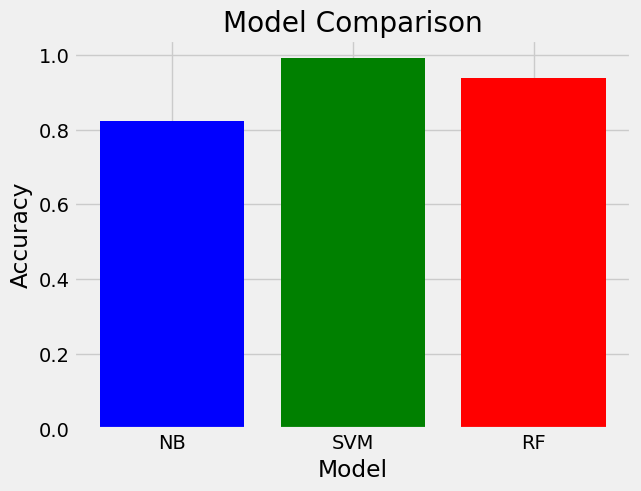

In [40]:
import matplotlib.pyplot as plt

# Model names
models = ['NB', 'SVM', 'RF']

# Corresponding model accuracies
accuracies = [accuracy_category_1, accuracy_category_2, accuracy_category_3]  # Example accuracies

# Create a bar chart
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the chart
plt.show()

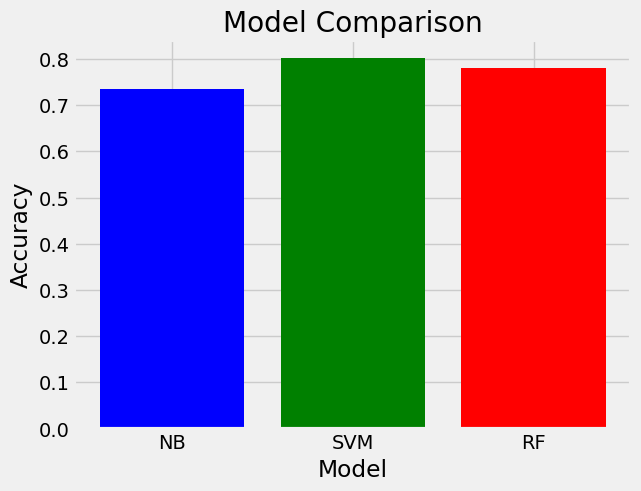

In [41]:
import matplotlib.pyplot as plt

# Model names
models = ['NB', 'SVM', 'RF']

# Corresponding model accuracies
accuracies = [accuracy_sentiment_1, accuracy_sentiment_2, accuracy_sentiment_3]  # Example accuracies

# Create a bar chart
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the chart
plt.show()

In [43]:
df.to_csv('data_clean.csv')